## Smart Real-Time Anomaly Detection in IIOT

### 1. Importing the Data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_excel("dataset.xlsx")
data.head()

,Date,Time,ESP_ms,Temperature_C,Pressure_hPa,AngleX,AngleY,AngleZ,AccX_g,AccY_g,AccZ_g,Altitude_m,Result
0,2025-09-09,23:51:11.197000,3924,32.64,976.15,-1.10,-0.52,-2.77,0.003,0.006,0.997,313.59,Normal
1,2025-09-09,23:51:14.191000,6927,32.65,976.15,-1.14,-0.50,-7.57,0.002,-0.002,0.996,313.54,Normal
2,2025-09-09,23:51:17.192000,9930,32.65,976.18,-1.10,-0.52,-12.40,0.003,0.003,0.989,313.35,Normal
3,2025-09-09,23:51:20.199000,12933,32.65,976.14,-1.21,-0.54,-17.25,0.000,0.000,0.992,313.62,Normal
4,2025-09-09,23:51:23.201000,15936,32.65,976.15,-1.15,-0.53,-22.12,0.002,0.003,0.994,313.60,Normal


In [54]:
data.columns

Index(['Date', 'Time', 'ESP_ms', 'Temperature_C', 'Pressure_hPa', 'AngleX',
       'AngleY', 'AngleZ', 'AccX_g', 'AccY_g', 'AccZ_g', 'Altitude_m',
       'Result'],
      dtype='object')

In [55]:
data.describe()

,Date,ESP_ms,Temperature_C,Pressure_hPa,AngleX,AngleY,AngleZ,AccX_g,AccY_g,AccZ_g,Altitude_m
count,3491,3.491000e+03,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,2025-09-12 10:08:25.299341312,1.228076e+06,31.560739,972.658794,-1.157001,-0.899917,-2109.087789,0.006335,0.010165,0.973688,340.010252
min,2025-09-09 00:00:00,3.845000e+03,0.000000,0.000000,-148.400000,-89.320000,-5919.260000,-2.215000,-0.698000,-1.945000,0.000000
25%,2025-09-10 00:00:00,4.648920e+05,31.720000,975.400000,-1.440000,-3.750000,-3113.750000,-0.010000,-0.004000,0.987000,315.175000
50%,2025-09-10 00:00:00,1.121055e+06,32.140000,975.720000,-1.260000,-0.820000,-1920.500000,0.006000,-0.001000,0.993000,317.260000
75%,2025-09-16 00:00:00,1.789215e+06,32.350000,975.960000,-1.110000,0.160000,-755.140000,0.056000,0.002000,0.997000,319.990000
max,2025-09-17 00:00:00,3.340272e+06,38.820000,998.580000,113.300000,79.410000,21.220000,1.785000,1.896000,2.055000,1709.870000
std,NaN,8.789202e+05,2.667138,30.106109,11.102353,9.084669,1544.742498,0.173747,0.116406,0.183141,175.307340


In [56]:
data.isnull().sum()

Date             0
Time             0
ESP_ms           0
Temperature_C    0
Pressure_hPa     0
AngleX           0
AngleY           0
AngleZ           0
AccX_g           0
AccY_g           0
AccZ_g           0
Altitude_m       0
Result           0
dtype: int64

In [57]:
data['Result'].value_counts()

Result
Normal     2913
Anomaly     578
Name: count, dtype: int64

### 2. Outlier Detection

Plotting the Box-Plot to identify or evaluate the outliers in the Dataset.

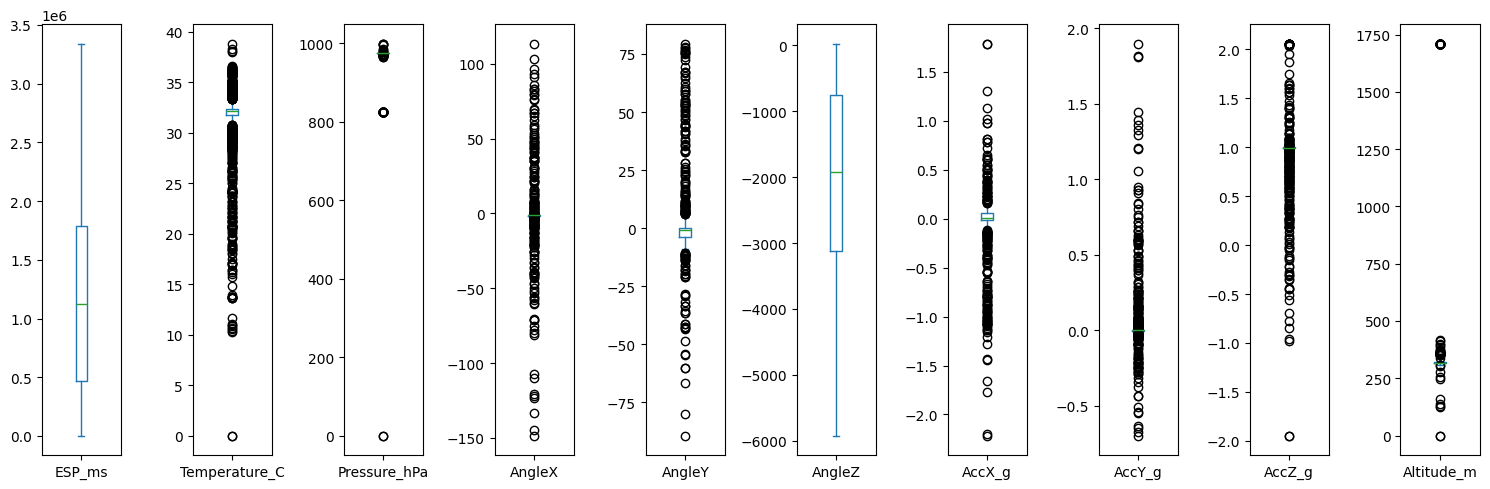

In [58]:
data.plot(kind='box', subplots=True, layout=(1,len(data.select_dtypes(include='number').columns)), figsize=(15,5))
plt.tight_layout()
plt.show()

Since all the Outliers are intentional error and not the Noise obtained due to sensor reading errors, leaving them as it is and proceeding further.

### 3. Converting Label into Binary.

In [60]:
# normalize strings first
data['Result_clean'] = data['Result'].astype(str).str.strip().str.capitalize()

# explicit mapping: Normal -> 0, Anomaly -> 1
mapping = {'Normal': 0, 'Anomaly': 1}
data['Label'] = data['Result_clean'].map(mapping)

# check
print(data['Label'].value_counts())
print(data[['Result','Result_clean','Label']].drop_duplicates())

Label
0    2913
1     578
Name: count, dtype: int64
     Result Result_clean  Label
0    Normal       Normal      0
28  Anomaly      Anomaly      1


In [66]:
data = data.drop('Result_clean', axis=1)

### 4. Feature Selection to Train the Model.

In [67]:
total_features = [f for f in data.columns]

# we doesn't need the Date, Time, ESP_ms, and also the result to detect the Anomaly.
excluded = ['Date', 'Time', 'ESP_ms', 'Result']
features = [f for f in total_features if f not in excluded]

In [68]:
features

['Temperature_C',
 'Pressure_hPa',
 'AngleX',
 'AngleY',
 'AngleZ',
 'AccX_g',
 'AccY_g',
 'AccZ_g',
 'Altitude_m',
 'Label']

Plotting the HeatMap to view the Correlations among the attributes.

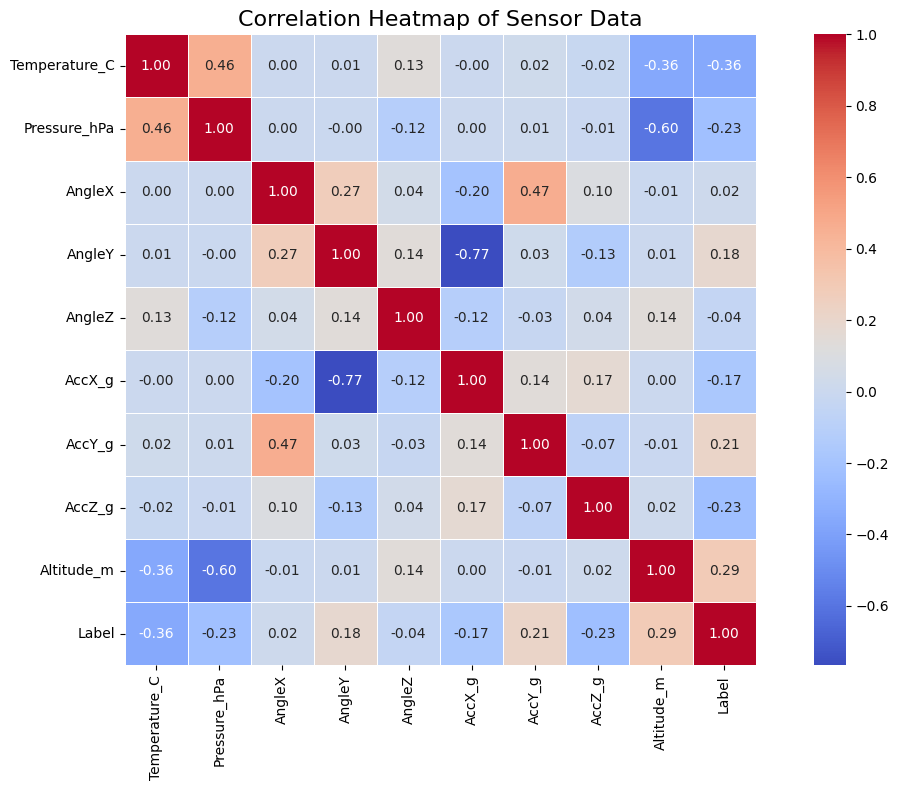

In [69]:
corr = data[features].corr()
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # color scheme
    cbar=True,           # show color bar
    square=True,         # square cells
    linewidths=0.5       # grid lines
)
plt.title("Correlation Heatmap of Sensor Data", fontsize=16)
plt.tight_layout()
plt.show()

Since all the Attributes shows atleast minor correlation to the result, in future there might be a possibility of dropping the Altitude since, it is inverse of pressure.

### 5. Applying SMOTE.

Applying the Synthetic Minority Oversampling Technique to increase the number of anomalies in the training dataset to make the model more robust enough and to handle the class imbalance.

Train and Test Split - 80 & 20 %

In [ ]:
X = data[features].drop('Label').copy()
y = data['Label'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
print("Train shape:", X_train.shape, "& Test shape:", X_test.shape)

In [ ]:
# Desired Anomaly Count - 30%
import math

nmaj = np.sum(y_train == 1)
nmin = np.sum(y_train == 0)
desired_minority = math.ceil((0.30 * nmaj) / (1 - 0.30))

In [ ]:
print(f"Training Normal: {nmaj}, Anomaly: {nmin}, target Anomaly after SMOTE: {desired_minority}")

In [ ]:
# Scaling before applying SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors

minor_label = 0
nn = NearestNeighbors(n_neighbors=5, n_jobs=-1)
sampling_strategy = {minor_label: desired_minority}
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=nn)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train.values)

In [ ]:
print("Resampled label counts:", np.bincount(y_resampled))

In [ ]:
X_resampled_unscaled = scaler.inverse_transform(X_resampled)
data_resampled_train = pd.DataFrame(X_resampled_unscaled, columns=features)
data_resampled_train["label"] = y_resampled
MOD_CSV_PATH = r"mod_train.csv"
data_resampled_train.to_csv(MOD_CSV_PATH, index=False)
print("Wrote resampled training CSV to:", MOD_CSV_PATH)

In [ ]:
data_test = X_test.copy()
data_test["label"] = y_test.values
MOD_CSV_TEST_PATH = r"test.csv"
data_test.to_csv(MOD_CSV_TEST_PATH, index=False)
print("Wrote test CSV to:", MOD_CSV_TEST_PATH)

### 6. Model Building

Planned to proceed with Random Forest and XGBoost method.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_df = pd.read_csv("mod_train.csv")
test_df  = pd.read_csv("test.csv")

In [ ]:
X_train, y_train = train_df.drop(columns=["label","Label"], errors="ignore"), train_df["label"]
X_test, y_test   = test_df.drop(columns=["label","Label"], errors="ignore"), test_df["label"]

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:,1]

In [ ]:
print("\n=== Random Forest ===")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance (RF):\n", importances)

In [ ]:
# y_test = true labels, y_pred = predictions from Random Forest (or XGBoost)
cm = confusion_matrix(y_test, rf_preds)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Normal (0)", "Anomaly (1)"],
            yticklabels=["Normal (0)", "Anomaly (1)"])
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

### 7. Saving the Model

In [ ]:
import joblib
import json

rf_filename = "rf_model.joblib"
scaler_filename = "scaler.joblib"
meta_filename = "model_meta.json"

# Save Random Forest (if present)
try:
    joblib.dump(rf, rf_filename)
    print("Saved Random Forest to", rf_filename)
except NameError:
    print("rf not defined — skipping RF save.")

In [ ]:
# Save scaler (if present)

# Correct feature set: drop the label(s)
X_train, y_train = train_df.drop(columns=["label","Label"], errors="ignore"), train_df["label"]

# Fit scaler on the proper features only
scaler = StandardScaler()
scaler.fit(X_train)

try:
    joblib.dump(scaler, scaler_filename)
    print("Saved scaler to", scaler_filename)
except NameError:
    print("scaler not defined — skipping scaler save.")


In [ ]:
# Save metadata (feature names + label encoder mapping if any)
try:
    meta = {
        "features": features  # list of feature column names in exact order
    }
    with open(meta_filename, "w") as f:
        json.dump(meta, f)
    print("Saved metadata to", meta_filename)
except NameError:
    print("feature_names not defined — save features list to meta file manually.")

### 8. Testing of the Random Forest Model.

In [ ]:
# ---- Robust manual inference / test cell ----
import joblib, json, pandas as pd, numpy as np

# Paths (adjust if your filenames differ)
RF_MODEL_FILE = "rf_model.joblib"
SCALER_FILE   = "scaler.joblib"
META_FILE     = "model_meta.json"
ENC_FILE      = "label_encoder.joblib"   # optional but recommended

# Load model
model = joblib.load(RF_MODEL_FILE)
print("Loaded model, expecting", model.n_features_in_, "features.")

# Load scaler if present
scaler = None
try:
    scaler = joblib.load(SCALER_FILE)
    print("Loaded scaler.")
except Exception as e:
    print("No scaler loaded (or failed):", e)

# Load metadata (features list)
with open(META_FILE, "r") as f:
    meta = json.load(f)
meta_features = meta.get("features", None)
if meta_features is None:
    raise RuntimeError("model_meta.json must contain 'features' list")

# Ensure meta_features is a list of actual feature names (no Label)
# If 'Label' slipped into meta_features, remove it safely:
feature_names = [f for f in meta_features if f.lower() not in ("label","result")]
print("Feature names from meta (cleaned):", feature_names)
if len(feature_names) != model.n_features_in_:
    # try to recover from model.feature_names_in_ if available
    if hasattr(model, "feature_names_in_"):
        feature_names = list(model.feature_names_in_)
        print("Using model.feature_names_in_ as feature list:", feature_names)
    else:
        raise RuntimeError(f"Feature count mismatch: meta has {len(feature_names)} but model expects {model.n_features_in_}")

# Load LabelEncoder (optional but strongly recommended)
le = None
try:
    le = joblib.load(ENC_FILE)
    print("Label encoder classes:", list(le.classes_))
except Exception as e:
    print("Label encoder not found or failed to load:", e)
    # fallback: derive class order from trained model (model.classes_)
    if hasattr(model, "classes_"):
        print("Using model.classes_:", list(model.classes_))

# Prepare manual sample values (must match order of feature_names)
# Replace values array below with the numbers you want to test (one-to-one with feature_names)
values = [30, 975.03, -1.16, 0.17, -5919.26, -0.017, -0.002, 0.997, 323.16]

if len(values) != len(feature_names):
    raise ValueError(f"Number of provided values ({len(values)}) does not match number of features ({len(feature_names)}).")

manual_sample = { feature_names[i]: values[i] for i in range(len(feature_names)) }
print("Manual sample prepared:", manual_sample)

# Build DataFrame with exact feature order
X_df = pd.DataFrame([manual_sample], columns=feature_names)

# If scaler expects particular columns, reindex to that order
if scaler is not None and hasattr(scaler, "feature_names_in_"):
    scal_feat = list(scaler.feature_names_in_)
    # add any missing features with 0s (or medians if you saved them)
    for f in scal_feat:
        if f not in X_df.columns:
            X_df[f] = 0.0
    # reorder
    X_df = X_df[scal_feat]

# Transform using scaler (pass DataFrame to keep names)
if scaler is not None:
    X_input = scaler.transform(X_df)
else:
    X_input = X_df.values.astype(float)

# Final shape check
if X_input.shape[1] != model.n_features_in_:
    raise ValueError(f"Prepared input has {X_input.shape[1]} features but model expects {model.n_features_in_}.")

# Predict
pred = model.predict(X_input)[0]
probs = model.predict_proba(X_input)[0]

# Determine index of 'Anomaly' class
anomaly_index = None
if le is not None:
    # find index where encoder class == "Anomaly"
    try:
        anomaly_index = int(np.where(le.classes_ == "Anomaly")[0][0])
    except Exception:
        # fallback: try to find by name in model.classes_
        if hasattr(model, "classes_"):
            anomaly_index = int(np.where(model.classes_ == "Anomaly")[0][0])
else:
    # fallback: if no encoder, use model.classes_
    if hasattr(model, "classes_"):
        try:
            anomaly_index = int(np.where(model.classes_ == "Anomaly")[0][0])
        except Exception:
            # as last resort, assume anomaly is 0 (but prefer explicit encoder)
            anomaly_index = 0

# Human-readable prediction
if le is not None:
    pred_label = le.inverse_transform([pred])[0]
else:
    # if no encoder, try to map from model.classes_
    if hasattr(model, "classes_"):
        pred_label = str(model.classes_[pred])
    else:
        pred_label = str(pred)

# Probability for the predicted class and for anomaly
confidence_pred = probs[pred]
prob_anomaly = probs[anomaly_index] if anomaly_index is not None else None

print("Predicted (numeric):", pred)
print("Predicted (label):", pred_label)
print(f"Confidence for predicted class: {confidence_pred*100:.2f}%")
if prob_anomaly is not None:
    print(f"Probability of Anomaly (class index {anomaly_index}): {prob_anomaly:.4f}")
print("All class probabilities:", { (le.classes_[i] if le is not None else str(model.classes_[i])): probs[i] for i in range(len(probs)) })